# 0. Imports and Plot Formatting <a name="imports"></a>

In [83]:
# IMPORTS
import sys
sys.path.append("../../")
import os

import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import *

import dill as pickle

from axion_kSZ_source.axion_camb_wrappers.run_axion_camb import AxionCAMBWrapper
from axion_kSZ_source.theory.cosmology import Cosmology
from axion_kSZ_source.theory.sigma_interpolation_FFTLog import SigmaInterpolatorFFTLog
from axion_kSZ_source.auxiliary.integration_helper import IntegrationHelper
from axion_kSZ_source.auxiliary.window_functions import WindowFunctions
from axion_kSZ_source.theory.eli_mass_functions import EliMassFunction
from axion_kSZ_source.theory.eli_mass_functions import BubbleMassFunction
from axion_kSZ_source.theory.eli_mass_functions import BMF2

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

import cosmod

cosmos = cosmod.cosmos
camb = cosmod.camb
lin_power = cosmod.lin_power
growth = cosmod.growth
sigmaInt = cosmod.sigmaInt
bubbleFunc = cosmod.bubbleFunc
pressSchechter = cosmod.pressSchechter
bubbleFunc_2 = cosmod.bubbleFunc_2
cosmo_names = cosmod.cosmo_names
cosmo_params = cosmod.cosmo_params

cosmo_dict = cosmod.cosmo_dict

# PLOT FORMATTING

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
#plt.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'


matplotlib.rcParams['font.family'] = 'Times New Roman'

rc("axes", linewidth=2.0)
rc("lines", markeredgewidth=4)
rc('xtick', labelsize = 20)
rc('ytick', labelsize = 20)

fig_width_pt = 703.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean=0.9
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
#
params = {'backend': 'pdf',
             'axes.labelsize': 14,
             'lines.markersize': 4,
             'font.size': 14,
             'xtick.major.size':6,
             'xtick.minor.size':3,
             'ytick.major.size':6,
             'ytick.minor.size':3,
             'xtick.major.width':0.5,
             'ytick.major.width':0.5,
             'xtick.minor.width':0.5,
             'ytick.minor.width':0.5,
             'lines.markeredgewidth':1,
             'axes.linewidth':1.2,
             'xtick.labelsize': 14,
             'ytick.labelsize': 14,
             'savefig.dpi':2000,
   #      'path.simplify':True,
   #      'font.family': 'serif',
   #      'font.serif':'Times',
             'text.usetex':True,
             'text.latex.preamble': [r'\usepackage{amsmath}'],
             'figure.figsize': fig_size}

plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/emelnick/anaconda3/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# Table of Contents
1. [Imports and Plot Formatting](#imports)
1. [Cosmology](#cosmo)
    1. [Cosmology Functions](#cosmo_functions)
    1. [Cosmologies](#cosmologies)
1. [Plots and Bubble Work](#plots)
1. [Testing, Scratch, and Junk](#test)

# 1. Cosmology <a name="cosmo"></a>

Everything that is evaluated for a certain cosmology is stored in the various arrays below, and anytime a cosmology is updated or added, the changes to the arrays should be computed automatically, so they can be called easily and consistently at any time

### A. Cosmology functions<a name="cosmo_functions"></a>

##### Saved cosmology
Use pickled cosmologies by loading the saved cosmology into `cosmo_dict` with `load_cosmology()`. Save the current cosmology with `save_cosmology()`. The last three cosmology updates done with `update_cosmo()` should be in autosaved files `'autosave_0.pkl'`, `'autosave_1.pkl'`, and `'autosave_2.pkl'`, if they exist.

In [59]:
cosmod.load_cosmology()

In [30]:
cosmod.save_cosmology()

In [53]:
load_cosmology('autosave_0.pkl')

In [44]:
cosmod.reset_cosmo()

### B. Cosmologies<a name='cosmologies'></a>

Run `cosmod.update_cosmo()` to update an existing cosmology, or `cosmod.new_cosmo()` add a new cosmology. Run the cell to update/add the cosmology.

In [74]:
cosmod.new_cosmo(name='cosmo0',m_ax=1e-26,ax_frac=0.005,h_param=0.72,rhff=True)
cosmod.new_cosmo(name='cosmo1',m_ax=1e-26,ax_frac=0.05 ,h_param=0.72,rhff=True)
cosmod.new_cosmo(name='cosmo2',m_ax=1e-26,ax_frac=0.5  ,h_param=0.72,rhff=True)
cosmod.new_cosmo(name='cosmo3',m_ax=1e-26,ax_frac=5e-8 ,h_param=0.72,rhff=True)

There is already a cosmology with name cosmo0
There is already a cosmology with name cosmo1
There is already a cosmology with name cosmo2
There is already a cosmology with name cosmo3


{'cosmos': [h=0.7200, omega_cdm=0.1192, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0006, h=0.7200, omega_cdm=0.1138, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0060, h=0.7200, omega_cdm=0.0599, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0599, h=0.7200, omega_cdm=0.1198, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0000], 'camb': [<axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd3606ba970>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583550>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583af0>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583a00>], 'lin_power': [<axion_kSZ_source.axion_camb_wrappers.power_interpolation.L

# 2. Plots and Bubble Work<a name="plots"></a>

### A. Plots of cosmology information

#### `Lin_power` plot

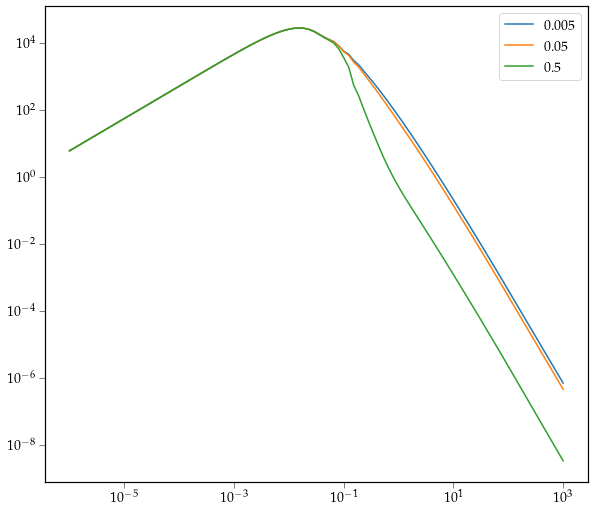

In [60]:
k_vals = np.logspace(-6, 3, 100)
plt.loglog(k_vals, cosmod.lin_power[0](k_vals),label='0.005')
plt.loglog(k_vals, cosmod.lin_power[1](k_vals),label='0.05')
plt.loglog(k_vals, cosmod.lin_power[2](k_vals),label='0.5')
plt.legend()

#### `growth` plot

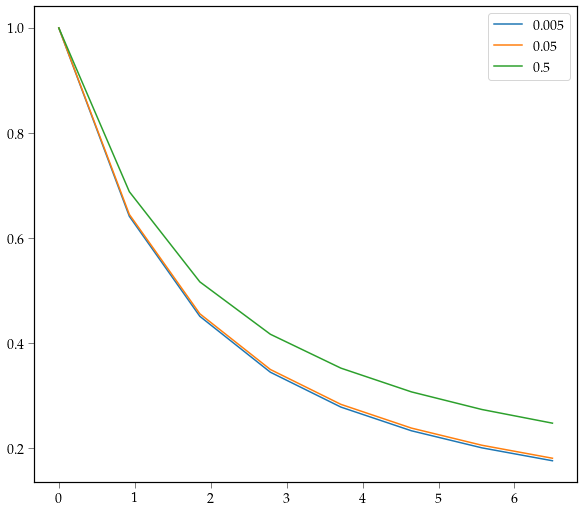

In [62]:
z_vals=np.linspace(0, 6.5, 8)
plt.plot(z_vals, cosmod.growth[0](1e0, z_vals),label='0.005')
plt.plot(z_vals, cosmod.growth[1](1e0, z_vals),label='0.05')
plt.plot(z_vals, cosmod.growth[2](1e0, z_vals),label='0.5')
plt.legend()

#### $\sigma$ plot as a function of mass

In [63]:
m_vals = np.logspace(-5, 16, 100)
plt.loglog(m_vals, cosmod.sigmaInt[0](m_vals, 0.0),label='0.005')
plt.loglog(m_vals, cosmod.sigmaInt[1](m_vals, 0.0),label='0.05')
plt.loglog(m_vals, cosmod.sigmaInt[2](m_vals,0.0),label='0.5')
plt.loglog(m_vals, cosmod.sigmaInt[3](m_vals,0.0),label='5e-8')
plt.loglog(m_vals,1.68*np.ones(len(m_vals)))
plt.legend()

IndexError: list index out of range

#### Bubble mass function

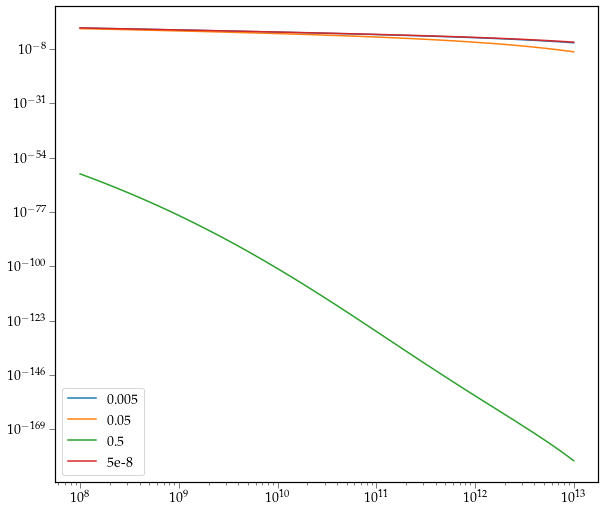

In [79]:
m_vals = np.logspace(8, 13, 100)
z = 12
plt.loglog(m_vals, bubbleFuncFFT[0](m_vals,z),label='0.005')
plt.loglog(m_vals, bubbleFuncFFT[1](m_vals,z),label='0.05')
plt.loglog(m_vals, bubbleFuncFFT[2](m_vals,z),label='0.5')
plt.loglog(m_vals, bubbleFuncFFT[3](m_vals,z),label='5e-8')
plt.legend()

#### Press-Schechter mass function

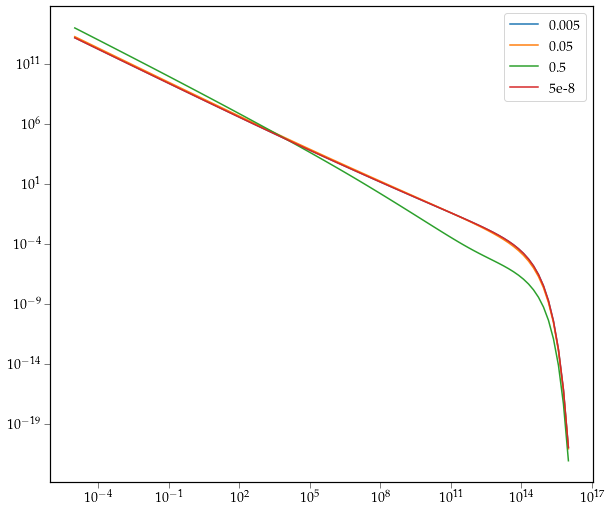

In [80]:
m_vals = np.logspace(-5,16,100)
z = 0
plt.loglog(m_vals,pressSchechterFFT[0](m_vals,z),label='0.005')
plt.loglog(m_vals,pressSchechterFFT[1](m_vals,z),label='0.05')
plt.loglog(m_vals,pressSchechterFFT[2](m_vals,z),label='0.5')
plt.loglog(m_vals,pressSchechterFFT[3](m_vals,z),label='5e-8')
plt.legend()

## Furlanetto Figure 2: Bubble distribution 

##### Plotting distrubtion
Distribution is $\overline{Q}^{-1}V\frac{\text{d}n}{\text{d}\ln R}$, but $\overline{Q}$ isn't working right.

In [20]:
z_vals = [0,6,12,16,18]
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for z in z_vals:
    for i, (cosmo,sigma,ps,bmf) in enumerate(zip(cosmos,sigmaIntFFT,pressSchechterFFT,bubbleFuncFFT)):
        
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        rho = cosmo.rho_mean * (1+z)**3
        
        integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
        Q = quad(integrand,np.log(mMin),np.log(20))[0]
        
        # R_vals = np.logspace(-3,2,500)
        # m_vals = (1/zeta) * sigma.mass_of_radius(R_vals)
      
        # m_vals = np.logspace(np.log10(mMin),20,500)
        # R_vals = radius_of_mass(m_vals)
        if i in [0,3]:
            print(f'cosmo {i} at z={z}:   Q = {Q}')
#         title1 = f'H II region distribution, {z} {i}'

#         plt.figure()
#         plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*bubbleFuncFFT[i](m_vals,z))
# #         plt.axvline(R_from_m(zeta*mMin,cosmos[i],z),c='black',linestyle='dashed')
#         plt.xscale('log')
#         plt.title(title1)
#         plt.xlabel(r"$R$ (Mpc)")
#         plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
#         # savename = f'QR_{i}_{z}.pdf'
#         # plt.savefig(savename)

cosmo 0 at z=0:   Q = 0.6577101228995226
cosmo 3 at z=0:   Q = 0.660808870642565
cosmo 0 at z=6:   Q = 0.00030264853232468323
cosmo 3 at z=6:   Q = 0.0003280137317877698
cosmo 0 at z=12:   Q = -1.5922394129739226e-05
cosmo 3 at z=12:   Q = -1.6112204809757747e-05
cosmo 0 at z=16:   Q = -3.2989532497830043e-06
cosmo 3 at z=16:   Q = -3.579799910624509e-06
cosmo 0 at z=18:   Q = -1.266140895994995e-06
cosmo 3 at z=18:   Q = -1.411348542893019e-06


## Testing integration methods

Want to get a stable method for determining $\overline{Q}$ that hopefully doesn't throw out a bunch of warnings.

#### A bunch of $Q$ integration methods

In [30]:
z_vals = [0,9,12,16,18]
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for z in z_vals:
    
    print(f"REDSHIFT z = {z}\n")
    for i, (cosmo,sigma,ps,bubble,bubble2) in enumerate(zip(cosmos,sigmaIntFFT,pressSchechterFFT,bubbleFuncFFT,bmf2)):
        print(f"COSMOLOGY {i}\n")
        print(f"Axion frac = {cosmo.axion_frac}")
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    #         mMin = (3.95284708e8/cosmo.h) * (1/(1+z))**(3/2)
    #         mMin = 1e1

        mMin *= 1e-8

        rho = cosmo.rho_mean * (1+z)**3
        print(f"rho = {rho}\n")

        integrand = lambda m: (1/rho) * ps(m,z) # dn/dlogm = m dn/dm
        integrand_log = lambda m: (np.exp(m)/rho) * ps(np.exp(m),z)

        # integrand = lambda m: (1/rho) * bubble(m,z)
        # integrand_log = lambda m: (1/rho) * bubble(10**m,z)

        # integrand = lambda m: (1/rho) * bubble2(m,z)
        # integrand_log = lambda m: (1/rho) * bubble2[i](10**m,z)


    #         R_vals = np.logspace(-3,2,500)
    #         m_vals = sigma.mass_of_radius(R_vals)

        m_vals = np.logspace(1,20,1000)
        m_vals_log = np.linspace(1,20,1000)
        R_vals = sigma.radius_of_mass(m_vals)


        print("Function-object integration:")
        # Quad
        Q_quad = quad(integrand,mMin,1.e20)[0]
        Q_quad_log = quad(integrand_log,np.log(mMin),np.log(1.e20))[0]     
        print(f"QUAD:\nQ = {Q_quad}\nQ_log = {Q_quad_log}\n")

        # Romberg
        Q_rmbg = romberg(integrand,mMin,1e20)
        Q_rmbg_log = romberg(integrand_log,np.log(mMin),np.log(1e20))
        print(f"ROMBERG:\nQ = {Q_rmbg}\nQ_log = {Q_rmbg_log}\n") 

        # Fixed quad
        Q_fixq = fixed_quad(integrand,mMin,1e20)[0] 
        Q_fixq_log = fixed_quad(integrand_log,np.log(mMin),np.log(1e20))[0]
        print(f"FIXED QUAD:\nQ = {Q_fixq}\nQ_log = {Q_fixq_log}\n")

        # Quadrature
        Q_qdtr = quadrature(integrand,mMin,1e20)[0]
        Q_qdtr_log = quadrature(integrand_log,np.log(mMin),np.log(1e20))[0]
        print(f"QUADRATURE:\nQ = {Q_qdtr}\nQ_log = {Q_qdtr_log}\n") 
        
        # Press Schechter
        print("\nFixed-sample integration:\n")
        # Trapezoid
        Q_trap = trapezoid((1/rho) * ps(m_vals,z),m_vals) 
        Q_trap_log = trapezoid((1/rho)*ps(m_vals_log,z),m_vals_log)
        print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

        # Cumulative trapezoid
        Q_ctrp = cumulative_trapezoid((1/rho) * ps(m_vals,z),m_vals)[-1]
        Q_ctrp_log = cumulative_trapezoid((1/rho) * ps(m_vals_log,z),m_vals_log)[-1]
        print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

        # Simpson
        Q_simp = simpson((1/rho) * ps(m_vals,z),m_vals) 
        Q_simp_log = simpson((1/rho) * ps(m_vals_log,z),m_vals_log)
        print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 
        
#         # Bubble mass function
#         print("\nFixed-sample integration:\n")
#         # Trapezoid
#         Q_trap = trapezoid((1/rho) * bubble(m_vals,z),m_vals) 
#         Q_trap_log = trapezoid((1/rho)*bubble(m_vals_log,z),m_vals_log)
#         print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

#         # Cumulative trapezoid
#         Q_ctrp = cumulative_trapezoid((1/rho) * bubble(m_vals,z),m_vals)[-1]
#         Q_ctrp_log = cumulative_trapezoid((1/rho) * bubble(m_vals_log,z),m_vals_log)[-1]
#         print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

#         # Simpson
#         Q_simp = simpson((1/rho) * bubble(m_vals,z),m_vals) 
#         Q_simp_log = simpson((1/rho) * bubble(m_vals_log,z),m_vals_log)
#         print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 

#         # Bubble mass function 2
#         print("\nFixed-sample integration:\n")
#         # Trapezoid
#         Q_trap = trapezoid((1/rho) * bubble2(m_vals,z),m_vals) 
#         Q_trap_log = trapezoid((1/rho)*bubble2(m_vals_log,z),m_vals_log)
#         print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

#         # Cumulative trapezoid
#         Q_ctrp = cumulative_trapezoid((1/rho) * bubble2(m_vals,z),m_vals)[-1]
#         Q_ctrp_log = cumulative_trapezoid((1/rho) * bubble2(m_vals_log,z),m_vals_log)[-1]
#         print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

#         # Simpson
#         Q_simp = simpson((1/rho) * bubble2(m_vals,z),m_vals) 
#         Q_simp_log = simpson((1/rho) * bubble2(m_vals_log,z),m_vals_log)
#         print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 

    print("#####################################################")


REDSHIFT z = 0

COSMOLOGY 0

Axion frac = 0.005000000000000001
rho = 75388498306.23651

Function-object integration:
QUAD:
Q = 1.4495013816203276e-49
Q_log = 0.9006656899930343

ROMBERG:
Q = 7327977032631.393
Q_log = 0.9006656837902373

FIXED QUAD:
Q = 0.0
Q_log = 0.6483229165692129

QUADRATURE:
Q = 0.0
Q_log = 0.9006668741821409


Fixed-sample integration:

TRAPEZOID:
Q = 0.903641909840783
Q_log = 0.012459995883574089

CUMULATIVE TRAPEZOID:
Q = 0.9036419098407829
Q_log = 0.012459995883574071

SIMPSON:
Q = 0.9033504505507854
Q_log = 0.012459889526913084

COSMOLOGY 1

Axion frac = 0.05000000000000002
rho = 75388498306.23651

Function-object integration:


/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.327991e+12
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.388763e-06
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.900730e+12
  warnings.warn(


QUAD:
Q = 9.111028136709829e-50
Q_log = 0.8777108903880051

ROMBERG:
Q = 8900712744222.324
Q_log = 0.8777108861565468

FIXED QUAD:
Q = 0.0
Q_log = 0.7134158268361219

QUADRATURE:
Q = 0.0
Q_log = 0.8777117430133659


Fixed-sample integration:

TRAPEZOID:
Q = 0.8812574974232238
Q_log = 0.015150123542001312

CUMULATIVE TRAPEZOID:
Q = 0.8812574974232246
Q_log = 0.015150123542001305

SIMPSON:
Q = 0.8809727716435092
Q_log = 0.015149994194042744

COSMOLOGY 2

Axion frac = 0.5
rho = 75388498306.23653

Function-object integration:


/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.229851e-06
  warnings.warn(
/tmp/ipykernel_1872/3492089718.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Q_quad_log = quad(integrand_log,np.log(mMin),np.log(1.e20))[0]
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.906507e+13
  warnings.warn(


QUAD:
Q = 2.5330808120559035e-51
Q_log = 0.12557616166806948

ROMBERG:
Q = 19065031761457.594
Q_log = 0.125576239116495

FIXED QUAD:
Q = 0.0
Q_log = 0.12462079150862586

QUADRATURE:
Q = 0.0
Q_log = 0.1255804227043935


Fixed-sample integration:

TRAPEZOID:
Q = 0.1327694923053451
Q_log = 0.03675959629852504

CUMULATIVE TRAPEZOID:
Q = 0.13276949230534474
Q_log = 0.03675959629852504

SIMPSON:
Q = 0.132720780626516
Q_log = 0.036759491785243965

COSMOLOGY 3

Axion frac = 5.000000000000001e-08
rho = 75388498306.23651

Function-object integration:
QUAD:
Q = 1.4562934605322796e-49
Q_log = 0.9028915988675034



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.383574e-06
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.703803e-05
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.177948e+12
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.439319e-06
  warnings.warn(


ROMBERG:
Q = 7177934082022.153
Q_log = 0.90289159419323

FIXED QUAD:
Q = 0.0
Q_log = 0.6467585384444768

QUADRATURE:
Q = 0.0
Q_log = 0.9028928848156125


Fixed-sample integration:

TRAPEZOID:
Q = 0.9058133556307133
Q_log = 0.012202395860972966

CUMULATIVE TRAPEZOID:
Q = 0.9058133556307139
Q_log = 0.012202395860972963

SIMPSON:
Q = 0.9055212424418055
Q_log = 0.012202291774160068

#####################################################
REDSHIFT z = 9

COSMOLOGY 0

Axion frac = 0.005000000000000001
rho = 75388498306236.52

Function-object integration:
QUAD:
Q = 0.0
Q_log = 0.00041830090805629317

ROMBERG:
Q = 1041219446035.0582
Q_log = 0.0004183014453055291

FIXED QUAD:
Q = 0.0
Q_log = 0.00039060716488882255

QUADRATURE:
Q = 0.0
Q_log = 0.0004183045966467458


Fixed-sample integration:

TRAPEZOID:
Q = 0.0003584907637394202
Q_log = 6.399261440958863e-05

CUMULATIVE TRAPEZOID:
Q = 0.00035849076373941995
Q_log = 6.399261440958874e-05

SIMPSON:
Q = 0.0003583657025107075
Q_log = 6.39920221299413

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.041221e+12
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.069921e+12
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.246635e+04
  warnings.warn(


ROMBERG:
Q = 1069919126507.7178
Q_log = 0.00034000494958353933

FIXED QUAD:
Q = 0.0
Q_log = 0.0003352560310808206

QUADRATURE:
Q = 0.0
Q_log = 0.0003400112972041363


Fixed-sample integration:

TRAPEZOID:
Q = 0.00027958240976999
Q_log = 6.409459119590945e-05

CUMULATIVE TRAPEZOID:
Q = 0.00027958240976999025
Q_log = 6.409459119590949e-05

SIMPSON:
Q = 0.00027948266554869624
Q_log = 6.40939801053318e-05

COSMOLOGY 2

Axion frac = 0.5
rho = 75388498306236.53

Function-object integration:
QUAD:
Q = 0.0
Q_log = 3.003287293741057e-13

ROMBERG:
Q = 22466.30990684607
Q_log = 3.3995242240595716e-12

FIXED QUAD:
Q = 0.0
Q_log = 9.022695235284995e-14

QUADRATURE:
Q = 0.0
Q_log = 3.782728409532041e-21


Fixed-sample integration:

TRAPEZOID:
Q = 2.90993077868422e-15
Q_log = 1.3326085465478804e-13

CUMULATIVE TRAPEZOID:
Q = 2.9099307786842196e-15
Q_log = 1.3326085465478804e-13

SIMPSON:
Q = 2.9050751107737017e-15
Q_log = 1.332478675258322e-13

COSMOLOGY 3

Axion frac = 5.000000000000001e-08
rho = 75

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.035877e+12
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.263999e+11
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 6.908018e+11
  warnings.warn(


ROMBERG:
Q = 726398494985.7308
Q_log = 0.00013729882324446473

FIXED QUAD:
Q = 0.0
Q_log = 0.00013896518241642358

QUADRATURE:
Q = 0.0
Q_log = 0.00013730236342622556


Fixed-sample integration:

TRAPEZOID:
Q = 0.00010613686726814486
Q_log = 2.886940187478691e-05

CUMULATIVE TRAPEZOID:
Q = 0.00010613686726814492
Q_log = 2.886940187478692e-05

SIMPSON:
Q = 0.00010609830277917654
Q_log = 2.8869119424094126e-05

COSMOLOGY 1

Axion frac = 0.05000000000000002
rho = 165628530778801.62

Function-object integration:
QUAD:
Q = 0.0
Q_log = 0.00010289006532105758

ROMBERG:
Q = 690800441341.0656
Q_log = 0.00010289007679179276

FIXED QUAD:
Q = 0.0
Q_log = 0.00010639513308201583

QUADRATURE:
Q = 0.0
Q_log = 0.00010288696588768397


Fixed-sample integration:

TRAPEZOID:
Q = 7.413769470870561e-05
Q_log = 2.61883828800508e-05

CUMULATIVE TRAPEZOID:
Q = 7.413769470870576e-05
Q_log = 2.618838288005079e-05

SIMPSON:
Q = 7.410984448879369e-05
Q_log = 2.6188114206621117e-05

COSMOLOGY 2

Axion frac = 0.5
rho

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.931886e+00
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.279292e+11
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.393576e+11
  warnings.warn(


CUMULATIVE TRAPEZOID:
Q = 1.1726415246537439e-20
Q_log = 3.3386707463674217e-18

SIMPSON:
Q = 1.1695566844498864e-20
Q_log = 3.338037079196418e-18

COSMOLOGY 3

Axion frac = 5.000000000000001e-08
rho = 165628530778801.62

Function-object integration:
QUAD:
Q = 0.0
Q_log = 0.0001411334921558534

ROMBERG:
Q = 727927803442.1215
Q_log = 0.00014113347652082933

FIXED QUAD:
Q = 0.0
Q_log = 0.0001422681687111091

QUADRATURE:
Q = 0.0
Q_log = 0.00014113855351742126


Fixed-sample integration:

TRAPEZOID:
Q = 0.00010981822268802016
Q_log = 2.905753850433274e-05

CUMULATIVE TRAPEZOID:
Q = 0.00010981822268802026
Q_log = 2.9057538504332702e-05

SIMPSON:
Q = 0.00010977844493164045
Q_log = 2.9057255601655167e-05

#####################################################
REDSHIFT z = 16

COSMOLOGY 0

Axion frac = 0.005000000000000001
rho = 370383692178540.0

Function-object integration:
QUAD:
Q = 0.0
Q_log = 3.761161675263717e-05

ROMBERG:
Q = 439356777114.26874
Q_log = 3.7611758032441914e-05

FIXED QUAD:

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.702821e+11
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.447042e-05
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.453141e+11
  warnings.warn(


ROMBERG:
Q = 445313215909.8786
Q_log = 3.912047615437166e-05

FIXED QUAD:
Q = 0.0
Q_log = 4.0383819734286184e-05

QUADRATURE:
Q = 0.0
Q_log = 3.909798075321274e-05


Fixed-sample integration:

TRAPEZOID:
Q = 2.5544681107743086e-05
Q_log = 1.0790036042798568e-05

CUMULATIVE TRAPEZOID:
Q = 2.554468110774307e-05
Q_log = 1.0790036042798564e-05

SIMPSON:
Q = 2.553482238452074e-05
Q_log = 1.078992088854857e-05

#####################################################
REDSHIFT z = 18

COSMOLOGY 0

Axion frac = 0.005000000000000001
rho = 517089709882476.25

Function-object integration:
QUAD:
Q = 0.0
Q_log = 2.0633752531351978e-05

ROMBERG:
Q = 336479378294.82635
Q_log = 2.0633961428358676e-05

FIXED QUAD:
Q = 0.0
Q_log = 2.095754449593291e-05

QUADRATURE:
Q = 0.0
Q_log = 2.063764445744296e-05


Fixed-sample integration:

TRAPEZOID:
Q = 1.195143464844587e-05
Q_log = 6.393917166532209e-06

CUMULATIVE TRAPEZOID:
Q = 1.1951434648445873e-05
Q_log = 6.39391716653221e-06

SIMPSON:
Q = 1.1946627007603746

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.364800e+11
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.651445e+11
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.941976e-08
  warnings.warn(


ROMBERG:
Q = 1.9419721944137693e-08
Q_log = 1.1451986864911455e-24

FIXED QUAD:
Q = 0.0
Q_log = 2.2135133407544594e-28

QUADRATURE:
Q = 0.0
Q_log = 3.4747861200062e-48


Fixed-sample integration:

TRAPEZOID:
Q = 8.606234661518836e-33
Q_log = 1.7233031730267467e-28

CUMULATIVE TRAPEZOID:
Q = 8.606234661518839e-33
Q_log = 1.723303173026745e-28

SIMPSON:
Q = 8.558053523802495e-33
Q_log = 1.722415703465805e-28

COSMOLOGY 3

Axion frac = 5.000000000000001e-08
rho = 517089709882476.25

Function-object integration:
QUAD:
Q = 0.0
Q_log = 2.1600880665645514e-05

ROMBERG:
Q = 343204973412.4659
Q_log = 2.1600969708984582e-05

FIXED QUAD:
Q = 0.0
Q_log = 2.2000207031142144e-05

QUADRATURE:
Q = 0.0
Q_log = 2.1551437635709546e-05


Fixed-sample integration:

TRAPEZOID:
Q = 1.2690432052283252e-05
Q_log = 6.589007550355097e-06

CUMULATIVE TRAPEZOID:
Q = 1.2690432052283245e-05
Q_log = 6.589007550355096e-06

SIMPSON:
Q = 1.2685355729729463e-05
Q_log = 6.588933357514784e-06

#############################

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.432056e+11
  warnings.warn(


#### $\overline{Q}$ vs. $z$

1e-05


/tmp/ipykernel_2514/3041878303.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Q[0].append(quad(integrand_PS,np.log(mMin),np.log(1.e30))[0])
/tmp/ipykernel_2514/3041878303.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges. 

1.344597962711289e-05
1.8079436813273487e-05
2.4309573906095062e-05
3.268660354851493e-05
4.3950340539284764e-05
5.9095538349589783e-05
7.945974047018528e-05
0.00010684140515377888
0.0001436587357029825
0.00019316324335190996
0.00025972690348168335
0.000349228265282783
0.0004695716140204276
0.0006313850355589193
0.0008489590324989185
0.0011415085855233929
0.0015348701185121992
0.00206378323437794
0.0027749587324222952
0.0037312038582229187
0.005016969106227038
0.006745806439218358
0.009070397595017708
0.012196038127242187
0.016398768019039046
0.022049750069374964
0.02964804902157471
0.03986470631277378
0.053602002892239486
0.07207314388614991
0.09690940243551485
0.1303041850823617
0.17520674179449827
0.23558262807016522
0.31676392175331614
0.425920123849947
0.5726913308063786
0.7700395966646751
1.0353936728823447
1.3921882231617595
1.8719334485739512
2.516997901283652
3.3843502502145957
4.550590451539986
6.118714650274111
8.227211253170303
11.06229148980818
14.874334600114508
20.000000

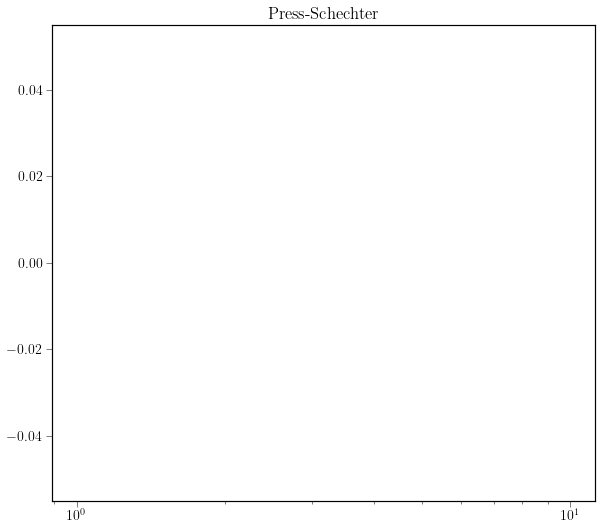

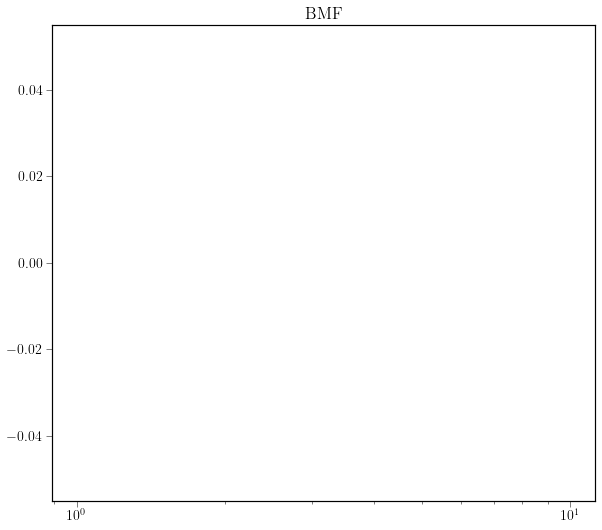

In [89]:
z_vals = np.logspace(-5,1+np.log10(2),50)
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

Q = [[],[],[]]

for z in z_vals:    
    print(z)
    
    i=3 # ΛCDM
    
    mMin = (1.308695e-10) * ((cosmos[i].RHO_C*1000 * cosmos[i].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    mMin *= 1e-8

    rho = cosmod.cosmos[i].rho_mean * (1+z)**3

    
    # Log-domain integrals
    integrand_PS = lambda m: (np.exp(m)/rho) * cosmo_dict['pressSchechter'][i](np.exp(m),z)
    integrand_BMF = lambda m: (np.exp(m)/rho) * cosmo_dict['bubbleFunc'][i](np.exp(m),z)
    # integrand_BMF2 = lambda m: (np.exp(m)/rho) * cosmo_dict['bubbleFunc_2'][i](np.exp(m),z)

    Q[0].append(quad(integrand_PS,np.log(mMin),np.log(1.e30))[0])
    Q[1].append(quad(integrand_BMF,np.log(mMin),np.log(1.e30))[0])
    # Q[2].append(quad(integrand_BMF2,np.log(mMin),np.log(1.e30))[0])

plt.figure()
plt.plot(z_vals,1-np.exp(-np.array(Q[0])))
plt.xscale('log')
plt.title('Press-Schechter')
# plt.show()
print((1-np.exp(-np.array(Q[0])))[0])

plt.figure()
plt.plot(z_vals,1-np.exp(-np.array(Q[1])))
plt.xscale('log')
plt.title('BMF')
# plt.show()
print((1-np.exp(-np.array(Q[1])))[0])

# plt.figure()
# plt.plot(z_vals,1-np.exp(-np.array(Q[2])))
# plt.xscale('log')
# plt.title('BMF 2')
# # plt.show()
# print((1-np.exp(-np.array(Q[2])))[0])

[<axion_kSZ_source.theory.eli_mass_functions.EliMassFunction object at 0x7fd3968d41c0>, <axion_kSZ_source.theory.eli_mass_functions.EliMassFunction object at 0x7fd3968d4e20>, <axion_kSZ_source.theory.eli_mass_functions.EliMassFunction object at 0x7fd3968d4eb0>, <axion_kSZ_source.theory.eli_mass_functions.EliMassFunction object at 0x7fd3968d4070>]


In [84]:
print(cosmo_dict)

{'cosmos': [h=0.7200, omega_cdm=0.1192, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0006, h=0.7200, omega_cdm=0.1138, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0060, h=0.7200, omega_cdm=0.0599, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0599, h=0.7200, omega_cdm=0.1198, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0000], 'camb': [<axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd3606ba970>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583550>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583af0>, <axion_kSZ_source.axion_camb_wrappers.run_axion_camb.AxionCAMBWrapper object at 0x7fd360583a00>], 'lin_power': [<axion_kSZ_source.axion_camb_wrappers.power_interpolation.L

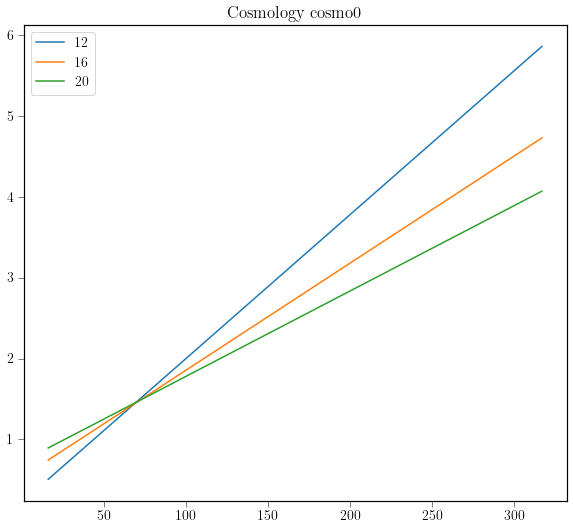

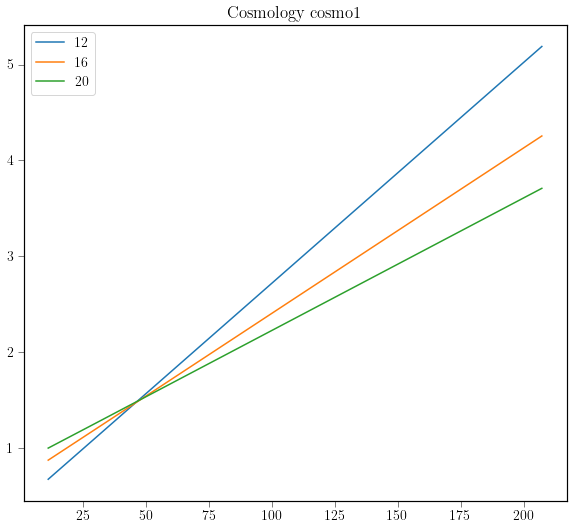

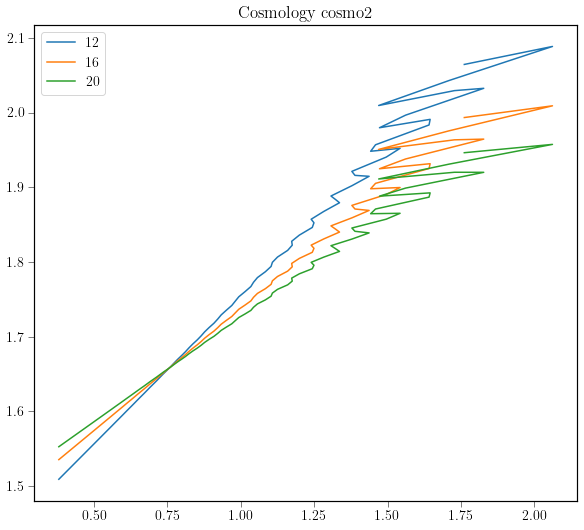

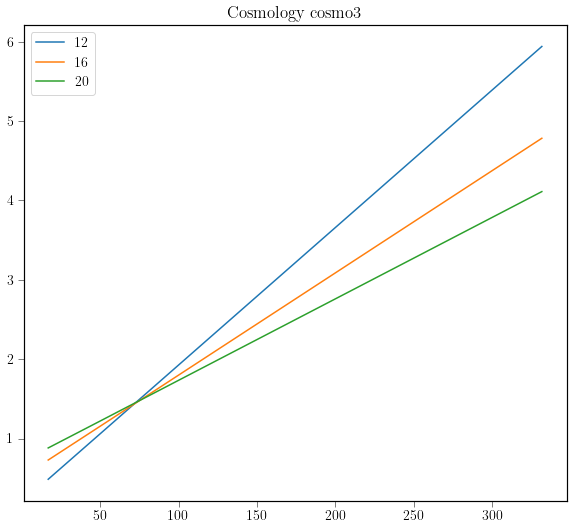

In [241]:
z_vals = [12,16,20]
m = np.logspace(-1,10,100)
for i in range(4):
    plt.figure()
    for z in z_vals:
        plt.plot((sigmaIntFFT[i](m,0))**2,bubbleFuncFFT[i].B(m,z),label=f'{z}')
    # plt.xscale('log')
    plt.legend()
    plt.title(f'Cosmology {cosmo_names[i]}')
    plt.show()

In [94]:
from scipy.special import erfinv

1.584911068059482


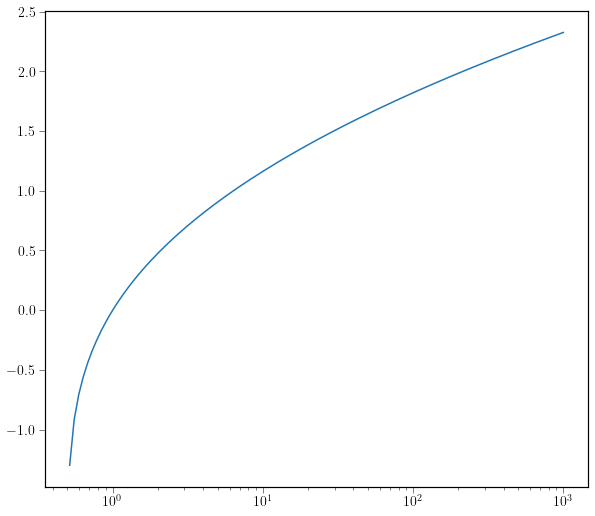

In [98]:
zeta = np.logspace(-3,3,200)
plt.plot(zeta,erfinv(1-1/zeta))
plt.xscale('log')
print(erfinv(1-1/40))

In [93]:
cosmo_dict['bubbleFunc']

[]

In [14]:
z = 12
m = np.logspace(-1,20)
print(sigmaIntFFT[0](m,z))

[1.66035358e+00 1.59066735e+00 1.52312286e+00 1.45761892e+00
 1.39405595e+00 1.33233562e+00 1.27236050e+00 1.21403358e+00
 1.15725782e+00 1.10193561e+00 1.04796834e+00 9.95255919e-01
 9.43696762e-01 8.93188557e-01 8.43630821e-01 7.94930968e-01
 7.47016178e-01 6.99852118e-01 6.53462368e-01 6.07929922e-01
 5.63367245e-01 5.19881456e-01 4.77566953e-01 4.36512867e-01
 3.96809334e-01 3.58550630e-01 3.21835052e-01 2.86762310e-01
 2.53429033e-01 2.21924337e-01 1.92330332e-01 1.64728697e-01
 1.39207331e-01 1.15860009e-01 9.47788163e-02 7.60433135e-02
 5.97072873e-02 4.57796325e-02 3.42012788e-02 2.48384091e-02
 1.74986802e-02 1.19754852e-02 7.96810191e-03 5.10340826e-03
 3.12450995e-03 1.83576567e-03 1.04395191e-03 5.79231706e-04
 3.15500850e-04 1.69492692e-04]


## PS mass function plot

In [ ]:
# z_vals = [0,12,16,18]
z_vals = np.linspace(0,20,101)
# z_vals = [0]
zeta = 40
i=3
Q_vals = []
for z in z_vals:
    mMin = 1e1
    rho = cosmos[i].rho_mean * (1+z)**3
    
    if (10*z)%15 == 0:
            m_valslin = np.linspace(1,16,100)
            m_valslog = np.logspace(1,16,100)
            
            plt.figure(0)
            plt.plot(m_valslin,bubbleFuncFFT[i](10**m_valslin,z),label=z)
            plt.figure(1)
            plt.loglog(m_valslog,bubbleFuncFFT[i](m_valslog,z),label=z)
            
plt.figure(0)
plt.yscale('log')
plt.ylim([1e-16,1e7])
plt.legend()

plt.figure(1)
plt.ylim([1e-16,1e7])
plt.legend()

While the plots are generally looking like the right shape, the $Q$ values are *really* small, which would suggest that the space being considered is barely ionized at all. Furlanetto was getting values between 0.01 and 1. If I had to guess, perhaps the issue is either with how $m_{\text{min}}$ is calculated or the bubble function $m\frac{\text{d}n}{\text{d}m}$. Maybe changing the barrier from $\delta_c(z),\sigma(m)$ to $\delta_c,\sigma(m,z)$ doesn't work as nicely as I thought.

I also have noticed that Furlanetto uses Lagrangian coordinates, which other sources have talked about a bit, but I haven't been able to wrap my head around what that means or the implications of it. Is it something to be concerned about?

doi:10.1093/mnras/stw1542 (Q integral from $r_\text{min}$to $\infty$)

doi.org/10.48550/arXiv.1401.7994 (A bit on Euler/Lagrange coordinates, among other things)

doi:10.1093/mnras/stw1060

https://ned.ipac.caltech.edu/level5/Sept15/Johnson/Johnson1.html virial stuff

# 3. Testing, Scratch, and Junk<a name="test"></a>

In [28]:
bubbleFuncFFT_2 = []
for i, cosmo in enumerate(cosmos):
    bubbleFuncFFT_2.append(BMF2(cosmo,sigmaIntFFT[i]))

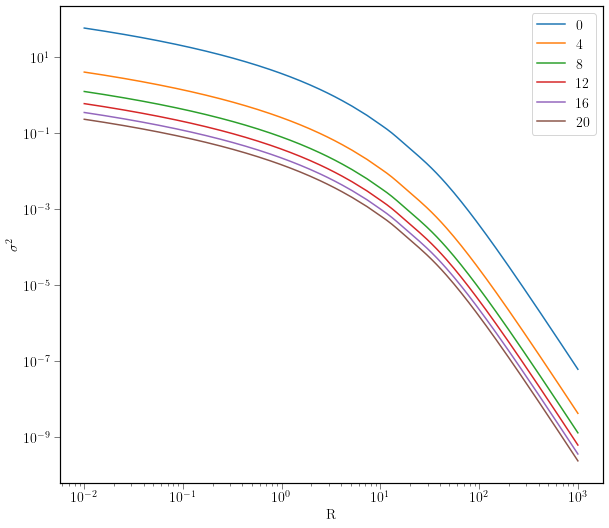

In [197]:
R_vals = np.logspace(-2,3,200)
i=3
for z in [0,4,8,12,16,20]:
    plt.loglog(R_vals,(sigmaIntFFT[i].sigma_of_r(R_vals,z))**2,label=z)
plt.xlabel('R')
plt.ylabel(r'$\sigma^2$')
plt.legend()

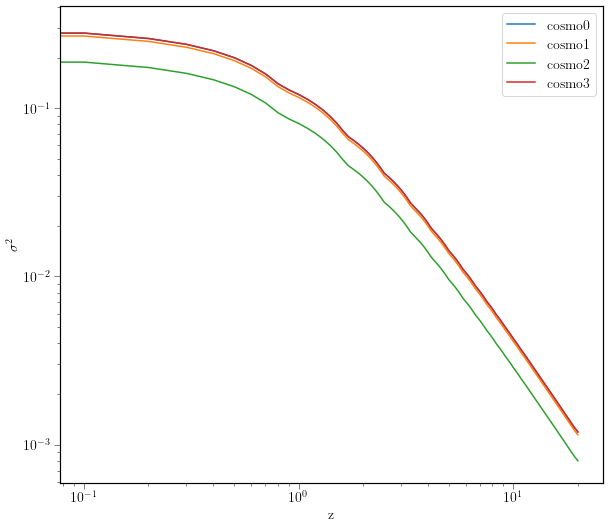

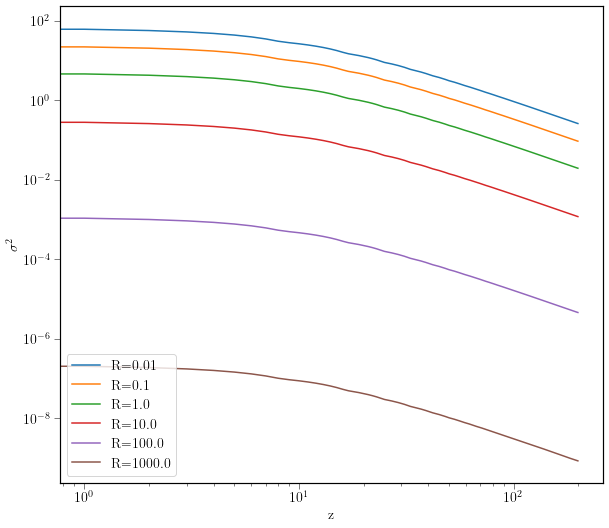

In [186]:
z_vals = np.linspace(0,20,200)
R = 10
for i in range(4):
    plt.loglog(z_vals,(sigmaIntFFT[i].sigma_of_r(cosmos[i].h*R,z_vals))**2,label=f'cosmo{i}')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\sigma^2$')
plt.figure()
for R in [1e-2,1e-1,1e0,1e1,1e2,1e3]:
    i = 3
    plt.loglog((sigmaIntFFT[i].sigma_of_r(cosmos[i].h*R,z_vals))**2,label=f'R={R}')
plt.xlabel('z')
plt.ylabel(r'$\sigma^2$')
plt.legend()

In [238]:
np.log10(sigmaIntFFT[3].mass_of_radius(0.04513))
sigmaIntFFT[3](10**8.6131520888446,0)**2

30.00043726871817

In [25]:
z=0
print(np.log10(sigmaIntFFT[3].mass_of_radius(0.04513)))
print(np.log10(m_from_R(0.04513,cosmos[3])))

7.46278970237513
7.46278970237513


In [10]:
bmf = bubbleFuncFFT[3]
bmf_v2 = bmf2[3]

In [70]:
print(bmf.B0(1e10,0))
print(bmf_v2.B0(1e8,0))

-7.280308698871156
-7.280308698871156


In [69]:
change_window('top_hat')

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


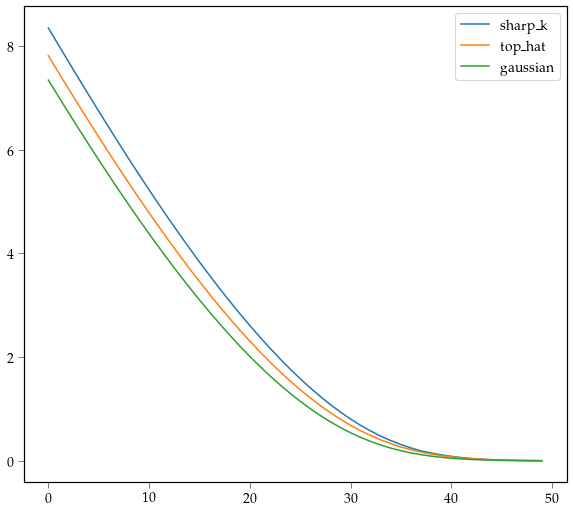

In [32]:
m_vals = np.logspace(6,20)

for (window,lbl) in zip(['sharp_k','top_hat','gaussian'],['sharp\_k','top\_hat','gaussian']):
    change_window(window)
    sigma = sigmaIntFFT[3]
    plt.plot(sigma(m_vals,0),label=lbl)
plt.legend()

In [71]:
for window in ['sharp_k','top_hat','gaussian']:
    change_window(window)
    print(sigmaIntFFT[0].window_function)

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


IndexError: list assignment index out of range

In [106]:
print(cosmo_dict['bubbleFunc'][3].sigma_min(0))
print(cosmo_dict['bubbleFunc'][3].sigma_min(12))
print(cosmo_dict['bubbleFunc'][3].sigma_min(16))
print(cosmo_dict['bubbleFunc'][3].sigma_min(20))

4.817094643495551
0.6642948490835328
0.5228269965507962
0.435245163770259


In [114]:
z=0
mMin = (1.308695e-10) * ((cosmos[3].RHO_C*1000 * cosmos[3].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2)
cosmo_dict['sigmaInt'][3](mMin,z)

4.817094643495551

In [110]:
print(cosmos)

[h=0.7200, omega_cdm=0.1192, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0006, h=0.7200, omega_cdm=0.1138, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0060, h=0.7200, omega_cdm=0.0599, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0599, h=0.7200, omega_cdm=0.1198, omega_b=0.0223, n_s=0.9652, tau=0.0540, log_1e10A_s=3.043000, m_axion=1.000E-26, omega_axion=0.0000]


In [112]:
print(cosmo_dict['sigmaInt'][3])